In [118]:
import gc
import multiprocessing
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as prfs
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score
from sklearn.utils import resample

In [119]:
df = pd.read_csv("../curated-data/ModelData_new.csv")
df.head(5)

,NASA,TA,EXT,AGR,CS,NT,OP,AV,EM,Task,...,NP,FA,SR,AP,AR,DWH,DWR,T,DS,Rank
0,24,38,2,8,10,3,8,16,17,26,...,2,1,1,2,4,2,70,1,1,2
1,17,35,6,9,7,4,8,25,14,31,...,2,1,1,2,5,2,70,1,1,1
2,20,38,8,8,6,5,7,19,22,29,...,1,2,1,2,4,2,90,2,2,0
3,16,54,3,7,3,9,6,23,24,16,...,2,1,0,2,2,2,60,1,2,0
4,18,28,6,4,10,3,8,13,12,35,...,1,2,1,2,5,1,60,2,1,2


In [120]:
BFI_List = ['EXT', 'AGR', 'CS', 'NT', 'OP']
df["BFI_SUM"] = df[BFI_List].sum(axis=1)

CISS_List = ['AV', 'EM', 'Task']
df["CISS_SUM"] = df[CISS_List].sum(axis=1)
df = df.drop(columns=['EXT', 'AGR', 'CS', 'NT', 'OP', 'AV', 'EM', 'Task'])

In [121]:
# from sklearn.model_selection import train_test_split
# Y = df.SR
# X = df.drop('SR', axis=1)

# # setting up testing and training sets
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=27)

In [122]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['SR']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

X_train = strat_train_set.drop('SR', axis=1)
Y_train = strat_train_set['SR'].copy()

X_test = strat_test_set.drop('SR', axis=1)
Y_test = strat_test_set['SR'].copy()

In [123]:
X = pd.concat([X_train, Y_train], axis=1)
Success = X[X.SR==1]
Not_Success = X[X.SR==0]

# upsample minority
success_upsampled = resample(Success,
                          replace=True, # sample with replacement
                          n_samples=len(Not_Success), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([Not_Success, success_upsampled])

# check new class counts
upsampled.SR.value_counts()
upsampled
Y_train = upsampled.SR
X_train = upsampled.drop('SR', axis=1)

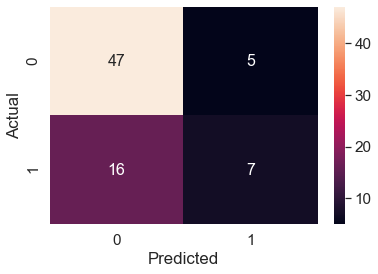

Wall time: 2.38 s


In [124]:
%%time
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 1600, max_features = 'auto', bootstrap = True)
rf.fit(X_train, Y_train)
y_pred = rf.predict(X_test)
y_score = rf.predict_proba(X_test)
conf_mat = pd.DataFrame(confusion_matrix(Y_test, y_pred))
sns.set(font_scale=1.4) # for label size
plot = sns.heatmap(conf_mat, annot=True, annot_kws={"size": 16}) # font size
plot.set(xlabel='Predicted', ylabel='Actual')
plt.show()

In [125]:
print("Accuracy: ", accuracy_score(Y_test, y_pred))
print("Precision: ", precision_score(Y_test, y_pred))
print("Recall: ", recall_score(Y_test, y_pred))
print("F1: ", f1_score(Y_test, y_pred))
print("Auc Score: ", roc_auc_score(Y_test, y_score[:,1]))

Accuracy:  0.72
Precision:  0.5833333333333334
Recall:  0.30434782608695654
F1:  0.4
Auc Score:  0.7182274247491639


In [126]:
print("Accuracy: ", accuracy_score(Y_test, y_pred))
print("Precision: ", precision_score(Y_test, y_pred))
print("Recall: ", recall_score(Y_test, y_pred))
print("F1: ", f1_score(Y_test, y_pred))
print("Auc Score: ", roc_auc_score(Y_test, y_score[:,1]))

Accuracy:  0.72
Precision:  0.5833333333333334
Recall:  0.30434782608695654
F1:  0.4
Auc Score:  0.7182274247491639


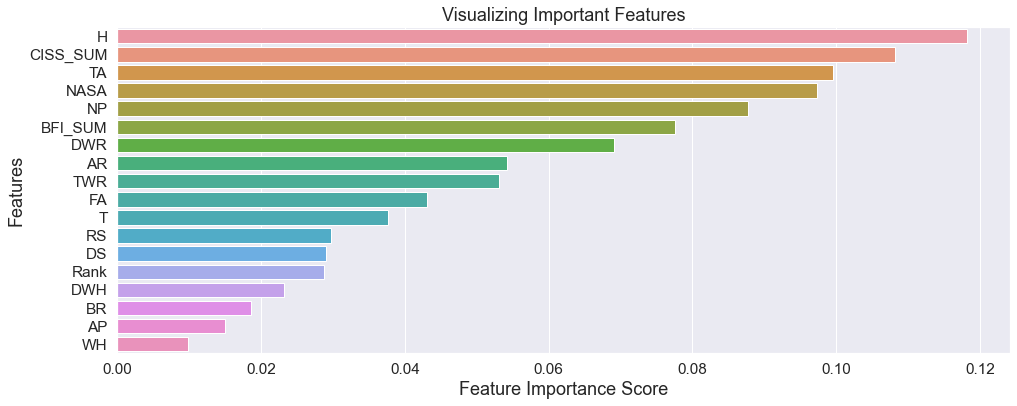

In [127]:
%matplotlib inline
feature_imp = pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
# Creating a bar plot
plt.figure(figsize=(16, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score', fontsize=18)
plt.ylabel('Features', fontsize=18)
plt.title("Visualizing Important Features", fontsize=18)
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)
# plt.legend()
plt.show()

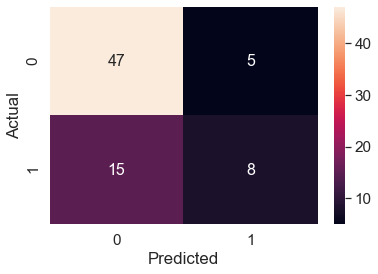

Wall time: 2.41 s


In [128]:
%%time
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators = 1600, max_features = 'auto', bootstrap = True)
rf.fit(X_train, Y_train)
y_pred = rf.predict(X_test)
y_score = rf.predict_proba(X_test)
conf_mat = pd.DataFrame(confusion_matrix(Y_test, y_pred))
sns.set(font_scale=1.4) # for label size
plot = sns.heatmap(conf_mat, annot=True, annot_kws={"size": 16}) # font size
plot.set(xlabel='Predicted', ylabel='Actual')
plt.show()

In [129]:
print("Accuracy: ", accuracy_score(Y_test, y_pred))
print("Precision: ", precision_score(Y_test, y_pred))
print("Recall: ", recall_score(Y_test, y_pred))
print("F1: ", f1_score(Y_test, y_pred))
print("Auc Score: ", roc_auc_score(Y_test, y_score[:,1]))

Accuracy:  0.7333333333333333
Precision:  0.6153846153846154
Recall:  0.34782608695652173
F1:  0.4444444444444444
Auc Score:  0.7303511705685619


In [130]:
y_pred = rf.predict(X_test)
y_score = rf.predict_proba(X_test)
pd.DataFrame(confusion_matrix(Y_test, y_pred))

,0,1
0,47,5
1,15,8


In [131]:
df_buffered = df[['H', 'CISS_SUM','TA', 'NASA','NP', 'BFI_SUM', 'DWR', 'AR', 'TWR','FA', 'SR']]

In [132]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_buffered, df_buffered['SR']):
    strat_train_set = df_buffered.loc[train_index]
    strat_test_set = df_buffered.loc[test_index]

X_train = strat_train_set.drop('SR', axis=1)
Y_train = strat_train_set['SR'].copy()

X_test = strat_test_set.drop('SR', axis=1)
Y_test = strat_test_set['SR'].copy()

In [133]:
X = pd.concat([X_train, Y_train], axis=1)
Success = X[X.SR==1]
Not_Success = X[X.SR==0]

# upsample minority
success_upsampled = resample(Success,
                          replace=True, # sample with replacement
                          n_samples=len(Not_Success), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([Not_Success, success_upsampled])

# check new class counts
upsampled.SR.value_counts()
upsampled
Y_train = upsampled.SR
X_train = upsampled.drop('SR', axis=1)

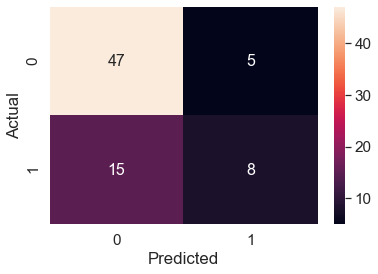

Wall time: 2.34 s


In [134]:
%%time
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 1600, max_features = 'auto', bootstrap = True)
rf.fit(X_train, Y_train)
y_pred = rf.predict(X_test)
y_score = rf.predict_proba(X_test)
conf_mat = pd.DataFrame(confusion_matrix(Y_test, y_pred))
sns.set(font_scale=1.4) # for label size
plot = sns.heatmap(conf_mat, annot=True, annot_kws={"size": 16}) # font size
plot.set(xlabel='Predicted', ylabel='Actual')
plt.show()


In [135]:
print("Accuracy: ", accuracy_score(Y_test, y_pred))
print("Precision: ", precision_score(Y_test, y_pred))
print("Recall: ", recall_score(Y_test, y_pred))
print("F1: ", f1_score(Y_test, y_pred))
print("Auc Score: ", roc_auc_score(Y_test, y_score[:,1]))

Accuracy:  0.7333333333333333
Precision:  0.6153846153846154
Recall:  0.34782608695652173
F1:  0.4444444444444444
Auc Score:  0.7153010033444817
